In [45]:
!pip install pandas
!pip install matplotlib
!pip install mysql-connector-python

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mysql.connector

In [169]:
cnx = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Afg64!Gcd000',
    database='generation'
)

In [184]:
cursor = cnx.cursor()
query = "SELECT * FROM has_annual_consumption"
cursor.execute(query)
result = cursor.fetchall()

df = pd.DataFrame(result, columns=[column[0] for column in cursor.description])



In [185]:
print(df.head(50))

   Code  Year  Primary energy consumption (TWh)   
0   DZA  1965                        24832647.0  \
1   DZA  1966                        29832527.0   
2   DZA  1967                        28247406.0   
3   DZA  1968                        30344986.0   
4   DZA  1969                        33539192.0   
5   DZA  1970                          367589.0   
6   DZA  1971                        39732845.0   
7   DZA  1972                         4464785.0   
8   DZA  1973                         5325068.0   
9   DZA  1974                        58908936.0   
10  DZA  1975                         7036968.0   
11  DZA  1976                         8210211.0   
12  DZA  1977                          902126.0   
13  DZA  1978                        11336147.0   
14  DZA  1979                         1485402.0   
15  DZA  1980                        17714294.0   
16  DZA  1981                        21518619.0   
17  DZA  1982                        24811212.0   
18  DZA  1983                  

In [186]:
## Find the highest total fossil fuel consuming countries across all the years. 
df_c = df.copy()
df_c = df_c.drop(['Year', 'Primary energy consumption (TWh)', 'Renewables (TWh - equivalent)'], axis=1) 
df_c = df_c.groupby(['Code'])['Fossil Fuels (TWh - equivalent)'].sum().reset_index().sort_values('Fossil Fuels (TWh - equivalent)', ascending = False).iloc[:,:]

df_c.reset_index(drop=True, inplace=True)
## Label all the countries besides the top 10 fossil fuel consuming ones as "Other" and sum their results. 
df_c.loc[10:, 'Code'] = 'Other'
df_c = df_c.groupby(['Code'])['Fossil Fuels (TWh - equivalent)'].sum().reset_index().sort_values('Fossil Fuels (TWh - equivalent)', ascending = False).iloc[:,:]

df_c.head(100)


,Code,Fossil Fuels (TWh - equivalent)
10,Other,3.123627e+10
0,ARG,1.942117e+09
1,CZE,1.792209e+09
8,ISL,1.707432e+09
3,ECU,1.649981e+09
5,IDN,1.565096e+09
4,EST,1.552876e+09
2,DEU,1.533059e+09
7,IRQ,1.466054e+09
9,JPN,1.464413e+09


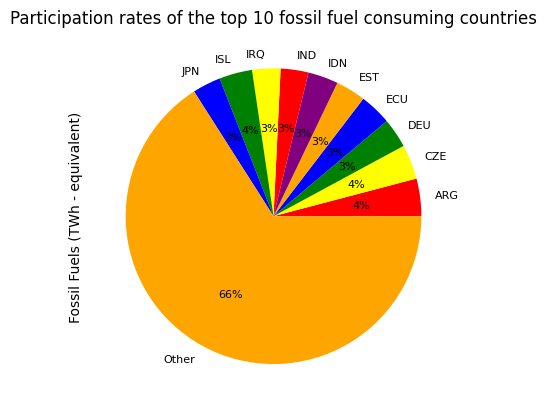

In [187]:
## Plot those countries' piechart based on participation on fossil fuel consumption.
df_c.groupby(['Code']).sum().plot(kind='pie', y='Fossil Fuels (TWh - equivalent)', autopct='%1.0f%%', textprops={'fontsize': 8},
                                  colors = ['red', 'yellow', 'green', 'blue', 'orange', 'purple'],
                                  title='Participation rates of the top 10 fossil fuel consuming countries')

plt.legend('', frameon=False)